# Estimate $\pi$

Given a function that could generate random number from 0 to 1 in **uniform distribute**, estimate $\pi$.

In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
from matplotlib import patches
from tqdm.notebook import tqdm

In [2]:
def estimate_pi(n):
    x_incircle = []
    y_incircle = []
    x_outcircle = []
    y_outcircle = []
    num_points_in_circle = 0
    num_points = 0
    for _ in tqdm(range(n)):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        d = x**2+y**2
        if d <= 1:
            num_points_in_circle += 1
            x_incircle.extend([x, -x, x, -x])
            y_incircle.extend([y, y, -y, -y])
        else:
            x_outcircle.extend([x, -x, x, -x])
            y_outcircle.extend([y, y, -y, -y])
        num_points += 1
    pi = 4*num_points_in_circle/num_points
    return pi, x_incircle, y_incircle, x_outcircle, y_outcircle

  0%|          | 0/1000 [00:00<?, ?it/s]

Cost 0.077 sec for 1000 points


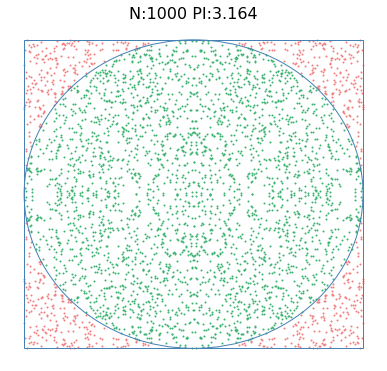

In [3]:
n = 1000
# run estimate function
t = round(time.time(), 4)
pi, x_incircle, y_incircle, x_outcircle, y_outcircle = estimate_pi(n)
print("Cost {} sec for {} points".format(round(time.time() - t, 4), n))

# plot
plt.figure(figsize=(6, 5.5))
plt.title("N:{} PI:{}".format(n, pi), fontsize=16)
# draw points
plt.scatter(x_incircle, y_incircle, s=1, c='mediumseagreen')
plt.scatter(x_outcircle, y_outcircle, s=1, c='lightcoral')
# draw circle
c = patches.Circle((0, 0), 1, lw=1, fill=0, ec='steelblue')
plt.gca().add_patch(c)
# draw square
r = patches.Rectangle((-1, -1), 2, 2, lw=1, fill=0, ec='steelblue')
plt.gca().add_patch(r)
# show
plt.tight_layout()
plt.axis('off')
plt.show()